# Unsupervised Learning: Preprocessing and Scaling

In [1]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings

from IPython.display import display
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

## Overview of the Chapter

Supervised Learning 은 모델을 만든 후에 테스팅을 하면, 이게 맞다 틀리다를 알 수가 있죠. 

반면, Unsupervised Learning은 본질적으로 해도 뭐가 잘 맞는지 아닌지 잘 알 수가 없습니다. 그래서, 이 두가지 방식으로 크게 쓰입니다.
- **Preprocessing step**: 데이터를 변형해서 supervised learning 이 더 잘되록 사용합니다.
- **Better understanding**: 데이터 사이언티스트들이 데이터를 더 잘 이해하도록 사용합니다.

이번장에서는 Preprocessing, Dimensionality Reduction, Clustering 을 알아봅니다.

## Preprocessing and Scaling

Scaling 하는 방법은 4가지가 있습니다: `StandardScaler`, `MinMaxScaler`, `RobustScaler`, `Normalizer`. 아래 그림을 보면 이해가 바로 되실껍니다.

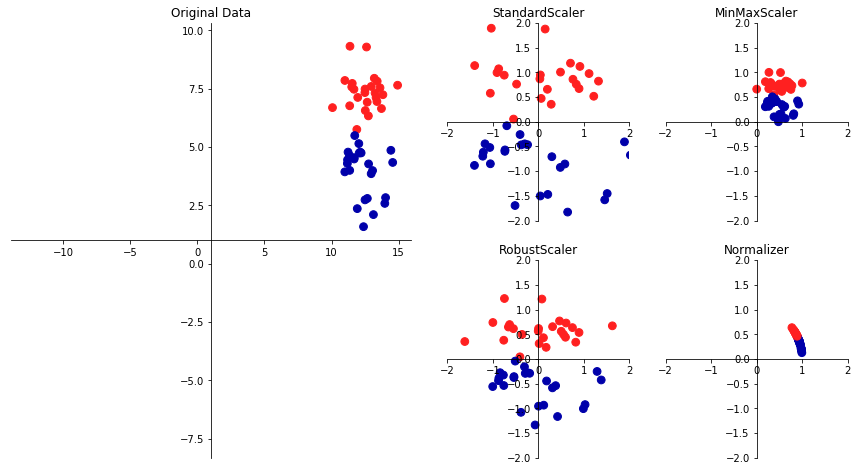

In [2]:
mglearn.plots.plot_scaling()

`MinMaxScaler`를 `cancer`데이터에 적용한 것을 보시죠.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

# transform test data
X_test_scaled = scaler.transform(X_test)

# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
per-feature minimum after s

### Scaling Training and Test Data the Same Way

중요한것은 trainig, test 셋을 모두 함께 scaling 해야죠. 아니면 망합니다.

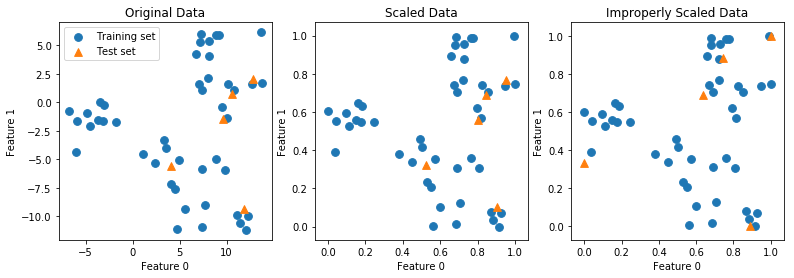

In [4]:
from sklearn.datasets import make_blobs

# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].scatter(X_train[:, 0], X_train[:, 1], label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data");

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0");
    ax.set_ylabel("Feature 1");

## Effective of Preprocessing for Supervised Learning

이미 [SVM](02-svm.ipynb)등에서 `cancer`데이터는 스케일링 해야 모델이 더 좋아진다고 봤었죠? 같은 실험을 또 해보겠습니다.

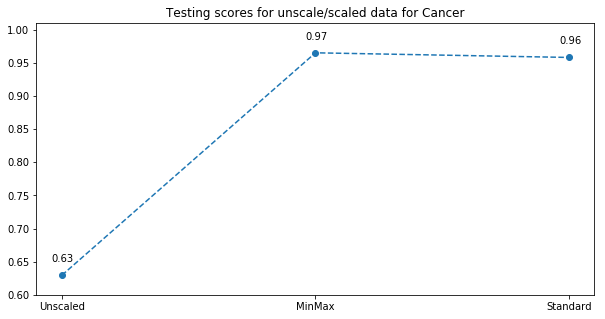

In [5]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)

scores = []
scores.append(svm.score(X_test, y_test))

# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
scores.append(svm.score(X_test_scaled, y_test))

# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
scores.append(svm.score(X_test_scaled, y_test))

# plot
plt.figure(figsize=(10, 5))
plt.title('Testing scores for unscale/scaled data for Cancer')
plt.ylim(0.6, 1.01)
for i in range(3):
    plt.text(i-0.04, scores[i]+0.02, f'{scores[i]:.2}')
plt.plot(['Unscaled', 'MinMax', 'Standard'], scores, marker='o', linestyle='--');